# Austin Animal Centre Shelter

I had a little bit of extra time this evening, so I thought I would open up a dataset and see where it takes me. I came across this pet adoption dataset and it made me curious. I live with two dogs, a rottweiler cross and pure bred golden retriever. My Rottie X was a resue, and she's been the most amazing companion from the day she started living with me. So when I saw this dataset, I couldn't help but dig into it to see what insights it reveals.
Here is rare a picture of my two beautiful dogs on the rare occasion that they both sit still for a photo op!

<img src='IMG_3801.jpg' width='35%'>

### Let's Get Started ...

In [1]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import statsmodels.discrete.discrete_model as sm

In [2]:
# Reading in data
intake = pd.read_csv('aac_intakes.csv')
outcomes = pd.read_csv('aac_outcomes.csv')
intake_outcomes = pd.read_csv('aac_intakes_outcomes.csv')

In [3]:
intake_outcomes.head()

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,...,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
0,10 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,...,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194
1,7 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,...,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722
2,6 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",2014-03-08 17:10:00,...,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,...,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139
4,16 years,A134067,1997-10-16 00:00:00,NaN,Return to Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,...,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444


In [4]:
intake_outcomes.shape

(79672, 41)

In [5]:
intake_outcomes.drop_duplicates().shape 
# There appears to be some duplicates in this table
# Let's remove those

(79637, 41)

In [6]:
intake_outcomes.drop_duplicates(inplace=True)

In [7]:
intake_outcomes.reset_index(inplace=True)

**There are a number of observations here:**
1. We can see that "outcome_subtype" has many missing values. Further exploration will reveal that this columns provides further details about what happend to the pet in question. Otherwise, the dataset looks pretty clean. This could be something I look into later on. 
2. We can also see that "age_upon_outcome" is a string. But we can also see that other age details are provided in the "age_upon_outcome_(days)", and "age_upon_outcome_(years) columns. So, I wouldn't worry too much about the intial coluns wherea age_upon_outcome is provided as dtype=str.
3. We can also see that "time_in_shelter" is given to us in a string. But we also have the column in days - which may be more useful for our purposes right now.
4. We also have lots of fun categorical details that we can dive into to really get a feel for what types of pets can be found in this no-kill animal shelter.

In [8]:
# To get a concise view of the columns names, however, let's print the column names.
intake_outcomes.columns

Index(['index', 'age_upon_outcome', 'animal_id_outcome', 'date_of_birth',
       'outcome_subtype', 'outcome_type', 'sex_upon_outcome',
       'age_upon_outcome_(days)', 'age_upon_outcome_(years)',
       'age_upon_outcome_age_group', 'outcome_datetime', 'outcome_month',
       'outcome_year', 'outcome_monthyear', 'outcome_weekday', 'outcome_hour',
       'outcome_number', 'dob_year', 'dob_month', 'dob_monthyear',
       'age_upon_intake', 'animal_id_intake', 'animal_type', 'breed', 'color',
       'found_location', 'intake_condition', 'intake_type', 'sex_upon_intake',
       'count', 'age_upon_intake_(days)', 'age_upon_intake_(years)',
       'age_upon_intake_age_group', 'intake_datetime', 'intake_month',
       'intake_year', 'intake_monthyear', 'intake_weekday', 'intake_hour',
       'intake_number', 'time_in_shelter', 'time_in_shelter_days'],
      dtype='object')

In [9]:
intake_outcomes['intake_type'].unique()

array(['Stray', 'Public Assist', 'Owner Surrender', 'Euthanasia Request',
       'Wildlife'], dtype=object)

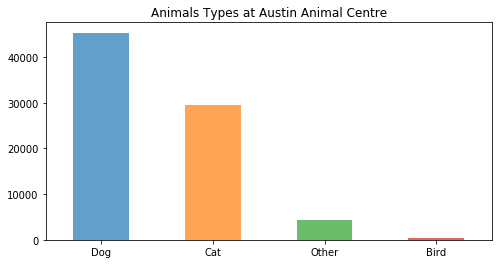

In [10]:
# Let's have a look to see what types of animals are brought into the shelter
intake_outcomes['animal_type'].value_counts().plot(kind='bar', figsize=(8,4), alpha = 0.7, rot=0)
plt.title('Animals Types at Austin Animal Centre')
plt.show()

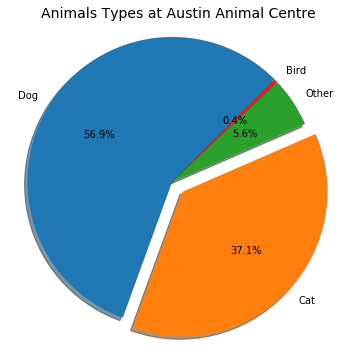

In [11]:
labels = intake_outcomes['animal_type'].value_counts().index
sizes = intake_outcomes['animal_type'].value_counts().values

explode = (0, 0.1, 0, 0)

fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=45)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Animals Types at Austin Animal Centre', fontsize=14)


plt.show()

**Obsevation:** Here, we can see that the majority of animals in the shelter are dogs, with cats coming in close behind. Birds and other species make up a small proportion of the animals who stay in the shelter.

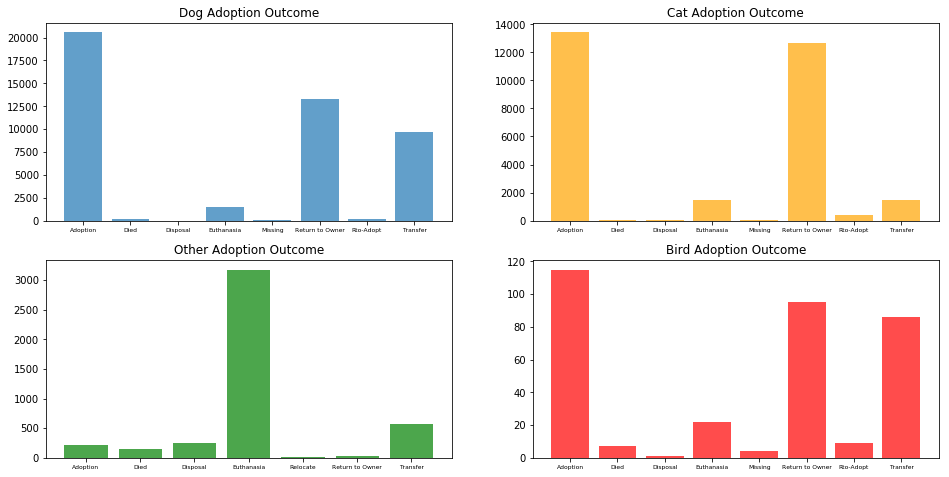

In [12]:
# Let's have a look at the likely outcome for each type of animal that comes into the shelter
fig=plt.figure(figsize = (16,8))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

x = ['Adoption', 'Return to Owner', 'Transfer', 'Euthanasia', 'Rto-Adopt',
       'Died', 'Missing', 'Disposal']
# Dog
dog = intake_outcomes[intake_outcomes['animal_type'] == 'Dog']['outcome_type'].value_counts().values
ax1 = plt.subplot(2,2,1)
plt.bar(x, dog, alpha = 0.7)
plt.title("Dog Adoption Outcome")
plt.setp(ax1.get_xticklabels(), fontsize=6)

# Cat
cat = intake_outcomes[intake_outcomes['animal_type'] == 'Cat']['outcome_type'].value_counts().values
ax2 = plt.subplot(2,2,2)
plt.bar(x,cat, color = 'orange', alpha = 0.7)
plt.title("Cat Adoption Outcome")
plt.setp(ax2.get_xticklabels(), fontsize=6)

# Bird
bird = intake_outcomes[intake_outcomes['animal_type'] == 'Bird']['outcome_type'].value_counts().values
ax4 = plt.subplot(2,2,4)
plt.bar(x,bird, color = 'red', alpha=0.7)
plt.title("Bird Adoption Outcome")
plt.setp(ax4.get_xticklabels(), fontsize=6)

# Other
x = intake_outcomes[intake_outcomes['animal_type'] == 'Other']['outcome_type'].value_counts().index
other = intake_outcomes[intake_outcomes['animal_type'] == 'Other']['outcome_type'].value_counts().values
ax3 = plt.subplot(2,2,3)
plt.bar(x, other, color = 'green', alpha = 0.7)
plt.title("Other Adoption Outcome")
plt.setp(ax3.get_xticklabels(), fontsize=6)

plt.show()

**Observation:** Here, we start to see some pattern as to what happens to pets when they entre the shelter. It appears that many of the animals falling under the "other" category end up being euthanised.

### How old are animals when they entre the shelter (years)? How old are they when they leave? How long do animals stay in the shelter for (days)?


In [13]:
round(intake_outcomes.groupby('animal_type')[['age_upon_intake_(years)', 'time_in_shelter_days', 
                                        'age_upon_outcome_(years)']].mean(), 2) # dividing by 365 gives age in years

,age_upon_intake_(years),time_in_shelter_days,age_upon_outcome_(years)
animal_type,,,
Bird,1.28,8.00,1.28
Cat,1.37,20.08,1.41
Dog,2.68,15.90,2.71
Other,1.22,4.02,1.23


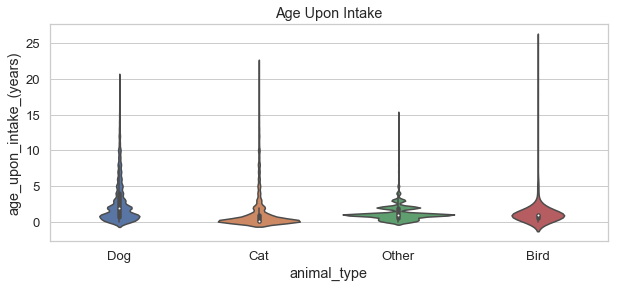

In [14]:
# Lets' visualise these
sns.set(style='whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(10, 4))
sns.violinplot(x='animal_type', y = 'age_upon_intake_(years)', 
               data = intake_outcomes).set_title('Age Upon Intake')
plt.show()

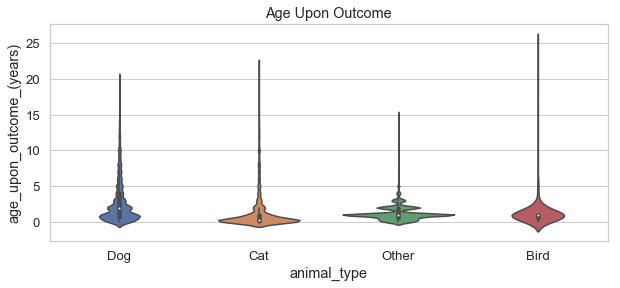

In [15]:
# Lets' visualise these
sns.set(style='whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(10, 4))
sns.violinplot(x='animal_type', y = 'age_upon_outcome_(years)', 
               data = intake_outcomes).set_title('Age Upon Outcome')
plt.show()

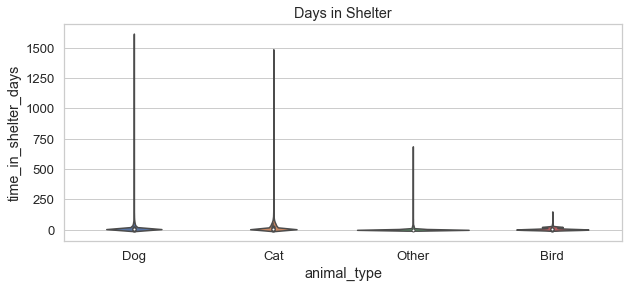

In [16]:
# Lets' visualise this
sns.set(style='whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(10, 4))
sns.violinplot(x='animal_type', y = 'time_in_shelter_days', 
               data = intake_outcomes).set_title('Days in Shelter')
plt.show()

**Observation:** From these graphs, we can see that age upon intake and age upon outcome show similar patterns. We can also see that number of days that the animals are in the shelter are relatively few. Taking all of this together, that "age_upon_intake" and "age_upon_outcome" are relatively similar makese sense.

### Which type of animal are most likely to return to the shelter?

In [17]:
# What number of animals return to the shelter
x = intake_outcomes['animal_id_intake'].value_counts()
c = 0
for i in x:
    if i >1:
        c+=1
print("number of animals who return to the shelter: {}".format(c))

number of animals who return to the shelter: 6050


In [18]:
# Create a temporary dataframe of repeat shelter visitors
tmp = pd.DataFrame(x).reset_index()

In [19]:
# tmp.head()

In [20]:
L=[]
for i in range(len(tmp)):
    if tmp['animal_id_intake'][i] > 1:
        L.append(tmp['index'][i])

In [21]:
len(L) #sanity check - this number matches the one above

6050

In [22]:
a_type = []
a_id = []
for i in range(len(intake_outcomes)):
    try:
        if intake_outcomes['animal_id_intake'][i] in L:
            a_type.append(intake_outcomes['animal_type'][i])
            a_id.append(intake_outcomes['animal_id_intake'][i])
    except:
        pass

In [23]:
tmp2 = pd.DataFrame({"a_id": a_id, "a_type": a_type})

In [24]:
tmp2.drop_duplicates(inplace=True)

In [25]:
tmp2['a_type'].value_counts()

Dog      4926
Cat      1112
Other      12
Name: a_type, dtype: int64

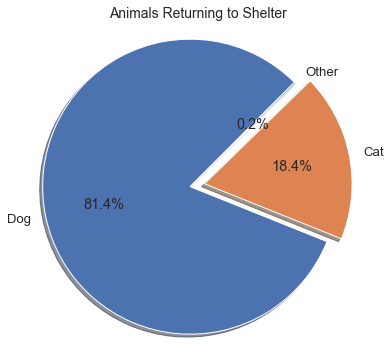

In [26]:
labels = tmp2['a_type'].value_counts().index
sizes = tmp2['a_type'].value_counts().values

explode = (0, 0.1, 0)

fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=45)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Animals Returning to Shelter', fontsize=14)

plt.show()

**Observation:** Of those who return to the shelter, the majority of them are dogs. Cats make up 18.4% of animals returnig to the shelter. Birds don't really return to the shelter ... 

### Seasonality

In [27]:
from datetime import datetime
intake_outcomes['intake_datetime'] = pd.to_datetime(intake_outcomes['intake_datetime'])

In [28]:
# intake_outcomes['intake_monthyear'].value_counts()
intake_outcomes['intake_monthyear']=pd.to_datetime(intake_outcomes['intake_monthyear'])

In [29]:
tmp = pd.DataFrame(intake_outcomes.groupby(['intake_monthyear'])['animal_id_intake'].count())
tmp.head()

,animal_id_intake
intake_monthyear,
2013-10-01,1587
2013-11-01,1321
2013-12-01,1270
2014-01-01,1270
2014-02-01,1190


In [30]:
dog = intake_outcomes[intake_outcomes['animal_type'] == 'Dog'].groupby('intake_monthyear')['animal_id_intake'].count()
cat = intake_outcomes[intake_outcomes['animal_type'] == 'Cat'].groupby('intake_monthyear')['animal_id_intake'].count()
bird = intake_outcomes[intake_outcomes['animal_type'] == 'Bird'].groupby('intake_monthyear')['animal_id_intake'].count()
other = intake_outcomes[intake_outcomes['animal_type'] == 'Other'].groupby('intake_monthyear')['animal_id_intake'].count()

In [31]:
tmp = pd.DataFrame({"Dog": dog, 'Cat': cat, "Bird": bird, "Other": other})

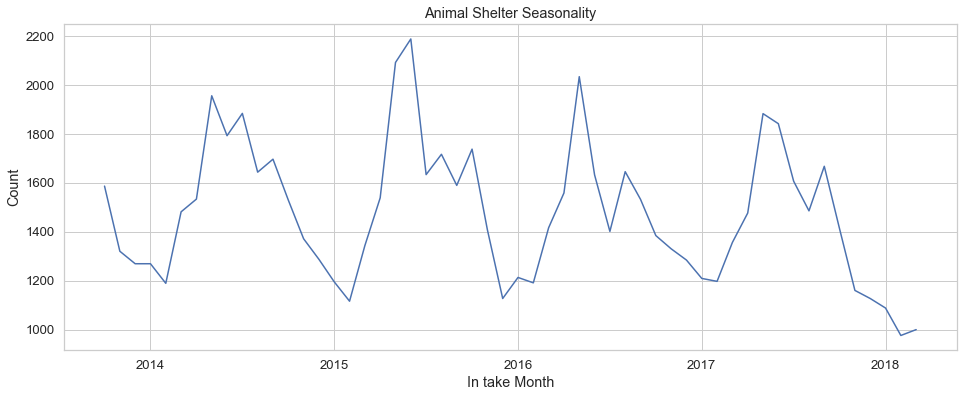

In [32]:
intake_outcomes.groupby('intake_monthyear')['animal_id_intake'].count().plot(figsize=(16, 6))
plt.title('Animal Shelter Seasonality')
plt.xlabel('In take Month')
plt.ylabel('Count')
plt.show()

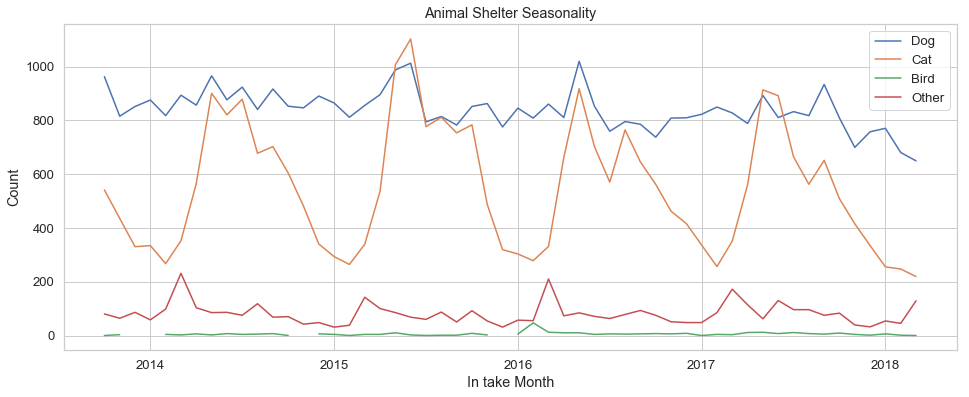

In [33]:
tmp.plot(figsize=(16, 6))
plt.title('Animal Shelter Seasonality')
plt.xlabel('In take Month')
plt.ylabel('Count')
plt.show()

**Observation:** Sometimes it is good to break down items in the dataset by categories to reveal trends. In the second graph, we can see that there really are no seaonalities for birds. For all other animals, there are clear seasonality trends. In particular for cats, cats tend to go to the shelter in the middle of the year, with a dip in winter months. Similar but less pronounced trends can be visible for dogs.

It's not unusual that we see a high number of dogs going into adoption, afterall, the majority of pets  recorded are dogs. 

In [34]:
dog = intake_outcomes[intake_outcomes['animal_type'] == 'Dog'].groupby('intake_month')['animal_id_intake'].count()
cat = intake_outcomes[intake_outcomes['animal_type'] == 'Cat'].groupby('intake_month')['animal_id_intake'].count()
bird = intake_outcomes[intake_outcomes['animal_type'] == 'Bird'].groupby('intake_month')['animal_id_intake'].count()
other = intake_outcomes[intake_outcomes['animal_type'] == 'Other'].groupby('intake_month')['animal_id_intake'].count()

In [35]:
tmp = pd.DataFrame({"Dog": dog, 'Cat': cat, "Bird": bird, "Other": other})

### Let's group by monthto see the pattern more clearly

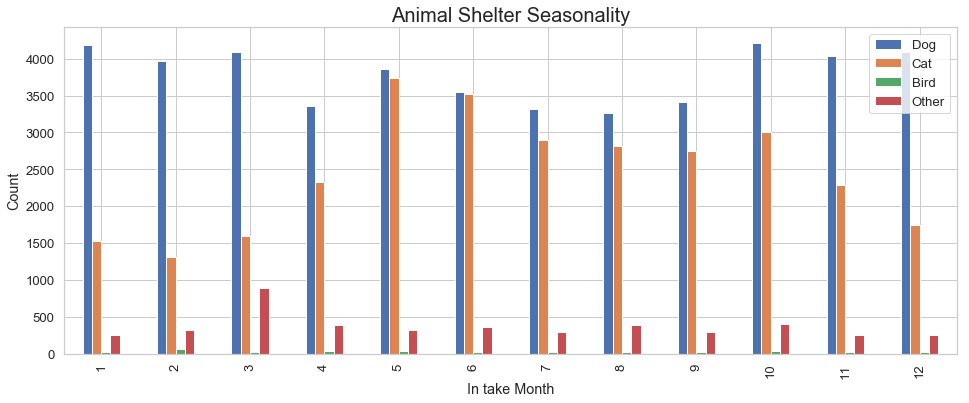

In [36]:
tmp.plot.bar(figsize=(16, 6))
plt.title('Animal Shelter Seasonality', fontsize=20)
plt.xlabel('In take Month')
plt.ylabel('Count')
plt.show()

**Discussion:**</p>
We see an interesting pattern happening here. While there are more entering the shelter in January, Feb, and March, cats quickly catch up by May. In the winter months, once again, we see the number of cats entering the shelter decrease. </p>

*What are some of the possible reasons for this?* </p>

Well, one could be weather - generally speaking winter months tend to be cooler than summer months. Dogs also require more exercise. As such, regardless of the temperature outside, dog owners must walk their dogs. It could prove to be too much for some owners - leading owners to give their pet up for adoption. However, having a quick search about the climate in [Austin](https://www.google.ca/search?q=austin+texas+climate&rlz=1C5CHFA_enCA773CA773&oq=austin+texas+clim&aqs=chrome.0.0j69i57j0l4.6398j0j7&sourceid=chrome&ie=UTF-8) Texas, this region usually experience milder temperatures, with winter teperatures ranging between high teens to low twenties. They also are subjected relatively little rainfall during this period. </p>

Another reason why we might see diverging seasonality for trends for dogs and cats, many people gift pets as as christmas presents without realising the committment it takes to care for a pet. With Christmas spirits over, the reality of pet ownership sets in. Again, with cats requiring less work from the owners, we see more dogs than cats entering the adoption facility. </p>

Finally, we also need to keep in mind that there are significantly more dogs than cats overall. Thus, we see more dogs in general entering the adoption facility.

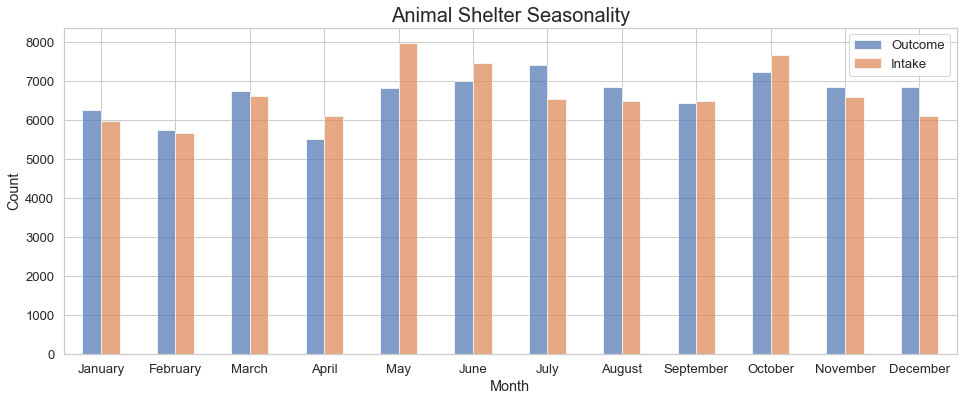

In [37]:
x = intake_outcomes.groupby('outcome_month')['animal_id_intake'].count()#.plot(figsize=(16, 6))
y = intake_outcomes.groupby('intake_month')['animal_id_intake'].count()#.plot(figsize=(16, 6))
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
          'October', 'November', 'December'] 

tmp = pd.DataFrame({'Outcome': x, 'Intake': y})
tmp.plot.bar(figsize=(16, 6), alpha = 0.7, rot=0)
plt.title('Animal Shelter Seasonality', fontsize=20)
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(np.arange(12), months)
plt.legend(['Outcome', 'Intake'])
plt.show()


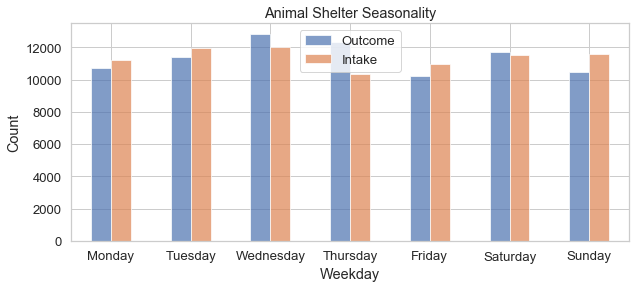

In [38]:
x = intake_outcomes.groupby('outcome_weekday')['animal_id_intake'].count()
y = intake_outcomes.groupby('intake_weekday')['animal_id_intake'].count()
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

tmp = pd.DataFrame({'Outcome': x, 'Intake': y})
tmp.plot.bar(figsize=(10, 4), alpha = 0.7, rot=0)
plt.title('Animal Shelter Seasonality')
plt.xlabel('Weekday')
plt.xticks(np.arange(7), weekdays)
plt.ylabel('Count')
plt.legend(['Outcome', 'Intake'])
plt.show()


In [39]:
wkday = pd.to_datetime(intake_outcomes['outcome_datetime'])
wkday2 = pd.to_datetime(intake_outcomes['intake_datetime'])

In [40]:
intake_outcomes['outcome_weekday'] = [i.weekday() for i in wkday]
intake_outcomes['intake_weekday'] = [i.weekday() for i in wkday2]

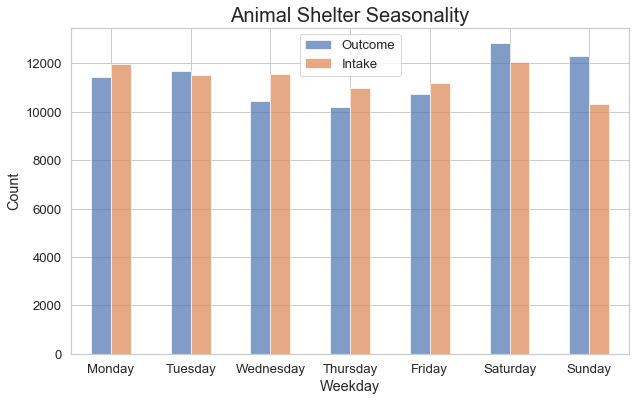

In [41]:
x = intake_outcomes.groupby('outcome_weekday')['animal_id_intake'].count()#.plot(figsize=(16, 6))
y = intake_outcomes.groupby('intake_weekday')['animal_id_intake'].count()#.plot(figsize=(16, 6))
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

tmp = pd.DataFrame({'Outcome': x, 'Intake': y})
tmp.plot.bar(figsize=(10, 6), alpha = 0.7, rot=0)
plt.title('Animal Shelter Seasonality', fontsize=20)
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.xticks(np.arange(7), weekdays)
plt.legend(['Outcome', 'Intake'], loc='best')
plt.show()

### Preparing Dataframe for Analysis
Do some analysis - convert categorical variables to numerical

In [42]:
# There are many categories in the outcome columns. Lets's simplify this so we can run a logistic regression
# Here are the outcome types
intake_outcomes.outcome_type.unique()

array(['Return to Owner', 'Transfer', 'Adoption', 'Euthanasia', 'Died',
       'Rto-Adopt', 'Missing', 'Disposal', nan, 'Relocate'], dtype=object)

In [43]:
# Let's remove all the rows where the outcome_type is "returned to owner"
df2 = intake_outcomes[intake_outcomes['outcome_type'] != 'Return to Owner']

In [44]:
# Next, let's categorize the remaining outcome_types such that Adoption is success and everything else is failure
df2['outcome_binary'] = [1 if i == 'Adoption' else 0 for i in df2['outcome_type']]

/Users/cherylto/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Month and Weekday

In [45]:
df2['intake_day_cat'] = [calendar.day_name[i] for i in df2['intake_weekday']]
df2['intake_month_cat'] = [calendar.month_name[i] for i in df2['intake_month']]
df2['outcome_year_cat'] = [str(i) for i in df2['outcome_year']]
df2['intake_year_cat'] = [str(i) for i in df2['intake_year']]

/Users/cherylto/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/cherylto/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/cherylto/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [46]:
df2.columns

Index(['index', 'age_upon_outcome', 'animal_id_outcome', 'date_of_birth',
       'outcome_subtype', 'outcome_type', 'sex_upon_outcome',
       'age_upon_outcome_(days)', 'age_upon_outcome_(years)',
       'age_upon_outcome_age_group', 'outcome_datetime', 'outcome_month',
       'outcome_year', 'outcome_monthyear', 'outcome_weekday', 'outcome_hour',
       'outcome_number', 'dob_year', 'dob_month', 'dob_monthyear',
       'age_upon_intake', 'animal_id_intake', 'animal_type', 'breed', 'color',
       'found_location', 'intake_condition', 'intake_type', 'sex_upon_intake',
       'count', 'age_upon_intake_(days)', 'age_upon_intake_(years)',
       'age_upon_intake_age_group', 'intake_datetime', 'intake_month',
       'intake_year', 'intake_monthyear', 'intake_weekday', 'intake_hour',
       'intake_number', 'time_in_shelter', 'time_in_shelter_days',
       'outcome_binary', 'intake_day_cat', 'intake_month_cat',
       'outcome_year_cat', 'intake_year_cat'],
      dtype='object')

In [47]:
df3 = pd.get_dummies(df2[['sex_upon_outcome',
       'age_upon_outcome_(days)', 'animal_type', 
        'intake_condition', 'intake_type',  'age_upon_intake_(days)', 
       'time_in_shelter_days', 'intake_month_cat', 'intake_day_cat', 'outcome_year_cat',
       'intake_year_cat','outcome_binary']], drop_first=True)
df3.head()

,age_upon_outcome_(days),age_upon_intake_(days),time_in_shelter_days,outcome_binary,sex_upon_outcome_Intact Male,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,sex_upon_outcome_Unknown,animal_type_Cat,animal_type_Dog,...,outcome_year_cat_2014,outcome_year_cat_2015,outcome_year_cat_2016,outcome_year_cat_2017,outcome_year_cat_2018,intake_year_cat_2014,intake_year_cat_2015,intake_year_cat_2016,intake_year_cat_2017,intake_year_cat_2018
3,3650,3650,4.970139,0,0,1,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
11,5110,5110,14.120139,0,0,0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
12,5840,5840,49.747917,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13,5110,5110,0.130556,0,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
14,6205,6205,9.020139,1,0,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0


### Let's get to the fun part ... Let's do some predictions ...

In [48]:
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

In [49]:
X = df3[['age_upon_outcome_(days)', 'age_upon_intake_(days)',
       'time_in_shelter_days', 
       'sex_upon_outcome_Intact Male',
       'sex_upon_outcome_Neutered Male', 'sex_upon_outcome_Spayed Female',
       'sex_upon_outcome_Unknown', 'animal_type_Cat',
       'animal_type_Dog', 'animal_type_Other', 
       'intake_condition_Feral', 'intake_condition_Injured',
       'intake_condition_Normal', 'intake_condition_Nursing',
       'intake_condition_Other', 'intake_condition_Pregnant',
       'intake_condition_Sick', 
       'intake_type_Owner Surrender', 'intake_type_Public Assist',
       'intake_type_Stray', 'intake_type_Wildlife', 
       'intake_month_cat_August', 'intake_month_cat_December',
       'intake_month_cat_February', 'intake_month_cat_January',
       'intake_month_cat_July', 'intake_month_cat_June',
       'intake_month_cat_March', 'intake_month_cat_May',
       'intake_month_cat_November', 'intake_month_cat_October',
       'intake_month_cat_September', 
       'intake_day_cat_Monday', 'intake_day_cat_Saturday',
       'intake_day_cat_Sunday', 'intake_day_cat_Thursday',
       'intake_day_cat_Tuesday', 'intake_day_cat_Wednesday',
       'outcome_year_cat_2014',
       'outcome_year_cat_2015', 'outcome_year_cat_2016',
       'outcome_year_cat_2017', 'outcome_year_cat_2018',
       'intake_year_cat_2014', 'intake_year_cat_2015',
       'intake_year_cat_2016', 'intake_year_cat_2017', 'intake_year_cat_2018']]
y = df3['outcome_binary']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [51]:
logreg = linear_model.LogisticRegression(C=1e5)

In [52]:
logreg.fit(X_train, y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [53]:
predictions = logreg.predict(X_test)

In [54]:
pred_proba = logreg.predict_proba(X_test)

In [55]:
from sklearn.metrics import classification_report
target_names = ['Adopted', 'Other']
print(classification_report(y_test, predictions, target_names=target_names))

             precision    recall  f1-score   support

    Adopted       0.90      0.71      0.80      9416
      Other       0.77      0.93      0.84     10040

avg / total       0.84      0.82      0.82     19456



In [56]:
score = logreg.score(X_test, y_test)
print("Accuracy: {}".format(round(score, 2)))

Accuracy: 0.82


In [57]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[6682 2734]
 [ 704 9336]]


In [58]:
# Using predictions
from sklearn.metrics import roc_auc_score
print("ROC_AUC: {}".format(round(roc_auc_score(y_test, predictions),2)))
# Using Probability
from sklearn.metrics import roc_auc_score
print("ROC_AUC (probabilities): {}".format(round(roc_auc_score(y_test, pred_proba[:,1]),2)))
from sklearn.metrics import r2_score
print("r2: {}".format(round(r2_score(y_test, predictions),2)))

ROC_AUC: 0.82
ROC_AUC (probabilities): 0.88
r2: 0.29


**Discussion:** </p>
Let's dissect what these values mean. </p>

We have a R-squared value of 0.17, indicating that our model explains 0.17 or 17% of the data. We've got a ROC_AUC of between 0.79 and 0.88 - which is significantly more than chance.
We also have an accuracy score of 0.82, meaning that our model is correct 82 percent of the time.</p>

However, having had a look at our confusion matrix, it seems like our model is predicting "Other" outcomes for animals that actually have been adopted. There may be other factors impacting the adoption outcomes of these pets, such as pet weight and size, "cuteness", temperament. These may be features we would want to explore if we had the data for it.</p>

Let's try to see if we can get better results with other models.

## Feature Importances

In [59]:
pd.DataFrame({"coef": logreg.coef_[0], 
              'features': X.columns,
              }).sort_values('coef', ascending=False)[:5]


,coef,features
5,3.340491,sex_upon_outcome_Spayed Female
4,3.233855,sex_upon_outcome_Neutered Male
19,2.127351,intake_type_Stray
17,2.077638,intake_type_Owner Surrender
18,1.107494,intake_type_Public Assist


In [60]:
# intake_outcomes.columns

In [61]:
df2.groupby('sex_upon_outcome')['outcome_binary'].mean()

sex_upon_outcome
Intact Female    0.095958
Intact Male      0.085436
Neutered Male    0.739715
Spayed Female    0.767969
Unknown          0.010302
Name: outcome_binary, dtype: float64

**Note: ** Remember, each of these features are coded as 1 or 0. So, when we ask for the mean, it will give us the proportion of those who are in that category. Here we clearly se that Neutered Male and Spayed  Female are most likely to be adeopted.

In [62]:
df2.groupby('intake_type')['outcome_binary'].mean()

intake_type
Euthanasia Request    0.056911
Owner Surrender       0.629439
Public Assist         0.375601
Stray                 0.529989
Wildlife              0.000868
Name: outcome_binary, dtype: float64

**Note: ** Looking at the means, it makes sense. Pets that are brought in for euthenasia are highly unlikely to be adopted. Likewise, wildlife are also highly unlikely to be adopted. In fact, there may be laws against keeping wild animals as pets. 

We see that Owner surrender and Stray are most likely to be adopted. Perhaps it is becuase there pets are actually very well cared for, and because of unforeseen circumstances, the owners can't keep the pets anymore. So, even though the pets end up at an adoption center, Owner Surrendered pets have a higher chance for adoption. 

Next, for Stray pets, it could be that they these pets may have had owers at one point, but may have gotten lost. If this is true, then we can assume that this category of pet intake can be in fairly good shape as well - as such have a higher chance of being adopted.

### Gradient Boosting

In [63]:
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
import math

In [64]:
clf = ensemble.GradientBoostingClassifier()
clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" %mse)

MSE: 0.1602


In [65]:
pred_gb = clf.predict(X_test)
pred_proba_gb = clf.predict_proba(X_test)

In [68]:
pd.DataFrame({"Feature": X_train.columns,
              "Importance": clf.feature_importances_}).sort_values(by = 'Importance', ascending=False)[:5]

,Feature,Importance
2,time_in_shelter_days,0.278865
0,age_upon_outcome_(days),0.101880
1,age_upon_intake_(days),0.093533
4,sex_upon_outcome_Neutered Male,0.076004
5,sex_upon_outcome_Spayed Female,0.075184


**Note: ** We get different features that are rated as important using gradient boosting. Features that the boosting tree found were important mostly have to do with age of the animal and how long the animal were in the shelter for.

We can also see that whether an animal has been neutered or spayed is much less important.

In [69]:
print("ROC_AUC: {}".format(round(roc_auc_score(y_test, pred_gb),2)))
print("ROC_AUC: {}".format(round(roc_auc_score(y_test, pred_proba_gb[:,1]),2)))

ROC_AUC: 0.84
ROC_AUC: 0.91


**Note:** Okay, the ROC_AUC metric looks a little better still. Will we gain further accuracy by combining the two models?

## Ensemble

In [70]:
# Combining Logistic Regression and Gradiant Boosting
ens = 0.3*pred_proba+0.7*pred_proba_gb

In [71]:
print("ROC_AUC: {}".format(round(roc_auc_score(y_test, ens[:,1]),2)))

ROC_AUC: 0.91


**Discussion:** </p>
It seems that we don't get any additional benefit for using an ensemble than using a gradient boost on it's own. The simplest method is usually the best method. So, let's just stick with Gradient Boosting.

But let's try one more.

# XGBoost

In [72]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [73]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [74]:
print(xgb_model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [75]:
y_pred = xgb_model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [76]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy*100))

Accuracy: 83.79%


In [77]:
from sklearn.metrics import classification_report
target_names = ['Adopted', 'Other']
print(classification_report(y_test, predictions, target_names=target_names))

             precision    recall  f1-score   support

    Adopted       0.92      0.73      0.81      9416
      Other       0.79      0.94      0.86     10040

avg / total       0.85      0.84      0.84     19456



In [78]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[6841 2575]
 [ 578 9462]]


In [79]:
# Using predictions
from sklearn.metrics import roc_auc_score
print("ROC_AUC: {}".format(round(roc_auc_score(y_test, predictions),2)))
# Using Probability
# from sklearn.metrics import roc_auc_score
# print("ROC_AUC (probabilities): {}".format(round(roc_auc_score(y_test, pred_proba[:,1]),2)))
from sklearn.metrics import r2_score
print("r2: {}".format(round(r2_score(y_test, predictions),2)))

ROC_AUC: 0.83
r2: 0.35


**Discussion: ** We see a slight improvement in accuracy by 1%, we also have slightly less false negatives.

## Feature Importances

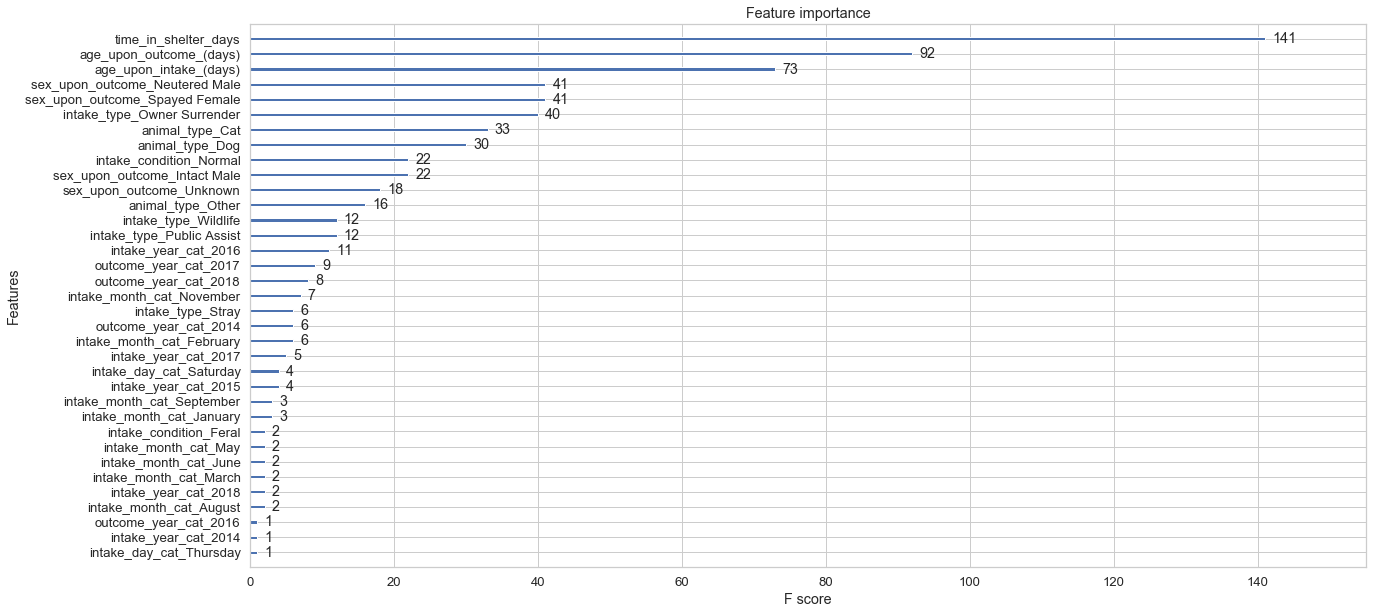

In [80]:
from xgboost import plot_importance
fig, ax = plt.subplots(1,1,figsize=(20, 10))
plot_importance(xgb_model, ax = ax)
plt.show()

## Grid Search

In [81]:
from sklearn.grid_search import GridSearchCV


/Users/cherylto/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/cherylto/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [82]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = [0.001,0.01,0.1,1,10,100]

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [83]:
# Create a classifier object with the classifier and parameter candidates
clf = GridSearchCV(logreg, hyperparameters, cv=5, verbose=0) 
# Note normally one would use cv=5, but to save time, we will stick with cv = 5

In [84]:
# Train the classifier on data1's feature and target data
best_model = clf.fit(X_train, y_train)  

/Users/cherylto/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:912: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/cherylto/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:912: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/cherylto/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:912: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/cherylto/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:912: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/cherylto/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:912: ConvergenceWarning: Liblinear failed to converge, increase th

In [85]:
best_model

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [86]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 1


In [87]:
predictions = best_model.predict(X_test)

In [88]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy*100))

Accuracy: 82.36%


In [89]:
from sklearn.metrics import classification_report
target_names = ['Adopted', 'Other']
print(classification_report(y_test, predictions, target_names=target_names))

             precision    recall  f1-score   support

    Adopted       0.91      0.71      0.80      9416
      Other       0.77      0.93      0.84     10040

avg / total       0.84      0.82      0.82     19456



In [90]:
# Using predictions
from sklearn.metrics import roc_auc_score
print("ROC_AUC: {}".format(round(roc_auc_score(y_test, predictions),2)))
# Using Probability
# from sklearn.metrics import roc_auc_score
# print("ROC_AUC (probabilities): {}".format(round(roc_auc_score(y_test, pred_proba[:,1]),2)))
from sklearn.metrics import r2_score
print("r2: {}".format(round(r2_score(y_test, predictions),2)))

ROC_AUC: 0.82
r2: 0.29


In [91]:
best_model.best_estimator_.score

<bound method ClassifierMixin.score of LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)>

## Home Stretch

Considering that the XGBoost model had the highest AUC score, we will consider that the age of pet and the number of days the animal has been in the shelter to be the the most important features related to whether an animal is adopted. 

In [101]:
df3.groupby('outcome_binary')['age_upon_outcome_(days)'].mean()

outcome_binary
0    652.147426
1    612.838907
Name: age_upon_outcome_(days), dtype: float64

In [98]:
a = df3[df3['outcome_binary'] == 1]['age_upon_outcome_(days)']
b = df3[df3['outcome_binary'] == 0]['age_upon_outcome_(days)']

In [100]:
from scipy.stats import stats
stats.ttest_ind(a, b)

Ttest_indResult(statistic=-5.368755461386978, pvalue=7.955351346445885e-08)

In [105]:
# Time in Shelter
df3.groupby('outcome_binary')['time_in_shelter_days'].mean()

outcome_binary
0     8.619500
1    29.456563
Name: time_in_shelter_days, dtype: float64

In [106]:
a = df3[df3['outcome_binary'] == 1]['time_in_shelter_days']
b = df3[df3['outcome_binary'] == 0]['time_in_shelter_days']

In [107]:
stats.ttest_ind(a, b)

Ttest_indResult(statistic=64.60323088439603, pvalue=0.0)

**Note: ** The above tests show the direction of the effect. The first test shows that animals that are younger are more likely to be adopted; this is significant at a .001 level. The second test shows that animals that have been in the shelter longer are more likely to be adopted. This is intersting, and I think it deserves further exploration. It may be that animals that have been in shelter for longer are those that have had operation done on them.

In [126]:
# It looks like there may be evidence to support our assumption
tmp_1 = df2[df2['sex_upon_outcome'] != df2['sex_upon_intake']][['sex_upon_outcome', 'sex_upon_intake', 'time_in_shelter_days']][:10]

In [127]:
tmp_2 = df2[df2['sex_upon_outcome'] == df2['sex_upon_intake']][['sex_upon_outcome', 'sex_upon_intake', 'time_in_shelter_days']][:10]

In [128]:
stats.ttest_ind(tmp_1['time_in_shelter_days'], tmp_2['time_in_shelter_days'])

Ttest_indResult(statistic=1.9615500794940328, pvalue=0.06547005542827058)

**Note: ** Okay... the test statistic was near significant ... there may be hidden interaction  effects. This will be the next step of this project

**Discussion:** Overall, in this project cleaned and prepped data for analysis. Five types of machine learning models were applied: Logistic Regression, Gradient Boosting, an Ensemble, XGBoost, and GridSearch. Of these methods, the ensemble performed the best with the highest accuracy. Using Log Reg and XGBoost allowed us to understand which features are most important in the model. 